In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats 

from env import get_db_url
import acquire
import split_scale

In [2]:
zillow = pd.read_csv('zillow.csv')  
zillow.info(), zillow.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14989 entries, 0 to 14988
Data columns (total 9 columns):
parcelid       14989 non-null int64
bathrooms      14989 non-null float64
bedrooms       14989 non-null float64
square_feet    14989 non-null float64
value          14989 non-null float64
tax_amount     14989 non-null float64
county         14989 non-null object
state          14989 non-null object
tax_rate       14989 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


(None,
            parcelid     bathrooms      bedrooms   square_feet         value  \
 count  1.498900e+04  14989.000000  14989.000000  14989.000000  1.498900e+04   
 mean   1.302688e+07      2.329175      3.316899   1943.199013  5.417072e+05   
 std    3.723472e+06      1.019406      0.936278   1001.275534  7.309616e+05   
 min    1.071210e+07      1.000000      1.000000    300.000000  1.050400e+04   
 25%    1.150299e+07      2.000000      3.000000   1276.000000  1.990000e+05   
 50%    1.258446e+07      2.000000      3.000000   1680.000000  3.852590e+05   
 75%    1.414275e+07      3.000000      4.000000   2346.000000  6.449720e+05   
 max    1.676392e+08     11.000000     12.000000  15450.000000  2.385837e+07   
 
           tax_amount      tax_rate  
 count   14989.000000  14989.000000  
 mean     6597.894501      0.013430  
 std      8453.776520      0.006885  
 min        51.260000      0.000787  
 25%      2710.810000      0.011602  
 50%      4776.080000      0.012305  
 75% 

In [3]:
zillow.head()

,parcelid,bathrooms,bedrooms,square_feet,value,tax_amount,county,state,tax_rate
0,11289917,2.0,3.0,1458.0,136104.0,2319.90,Los_Angeles,CA,0.017045
1,11705026,1.0,2.0,1421.0,35606.0,543.69,Los_Angeles,CA,0.015270
2,14269464,3.0,4.0,2541.0,880456.0,9819.72,Orange,CA,0.011153
3,11389003,2.0,3.0,1650.0,614000.0,7673.19,Los_Angeles,CA,0.012497
4,11967869,1.0,2.0,693.0,274237.0,3267.47,Los_Angeles,CA,0.011915


In [4]:
# Split the data
train, test = split_scale.split_my_data(zillow, 0.8)
train.head()

,parcelid,bathrooms,bedrooms,square_feet,value,tax_amount,county,state,tax_rate
7044,14245713,2.5,4.0,2757.0,386909.0,4532.08,Orange,CA,0.011714
5738,10931113,1.0,2.0,1368.0,780000.0,9376.91,Los_Angeles,CA,0.012022
1383,10726466,3.0,4.0,2569.0,117583.0,1649.09,Los_Angeles,CA,0.014025
14558,12089023,3.0,3.0,1845.0,588770.0,7180.76,Los_Angeles,CA,0.012196
13146,11520495,1.0,2.0,747.0,424532.0,5090.22,Los_Angeles,CA,0.011990


In [5]:
# Scale the dataset with IQR because outliers, and create csv for use in modeling
train_num = train[['bathrooms', 'bedrooms', 'square_feet', 'value']]
test_num = test[['bathrooms', 'bedrooms', 'square_feet', 'value']]

scaler, train_iqr, test_iqr = split_scale.iqr_robust_scaler(train_num, test_num)

train.to_csv('train.csv')
test.to_csv('test.csv')

train_iqr.to_csv('train_iqr.csv')
test_iqr.to_csv('test_iqr.csv')

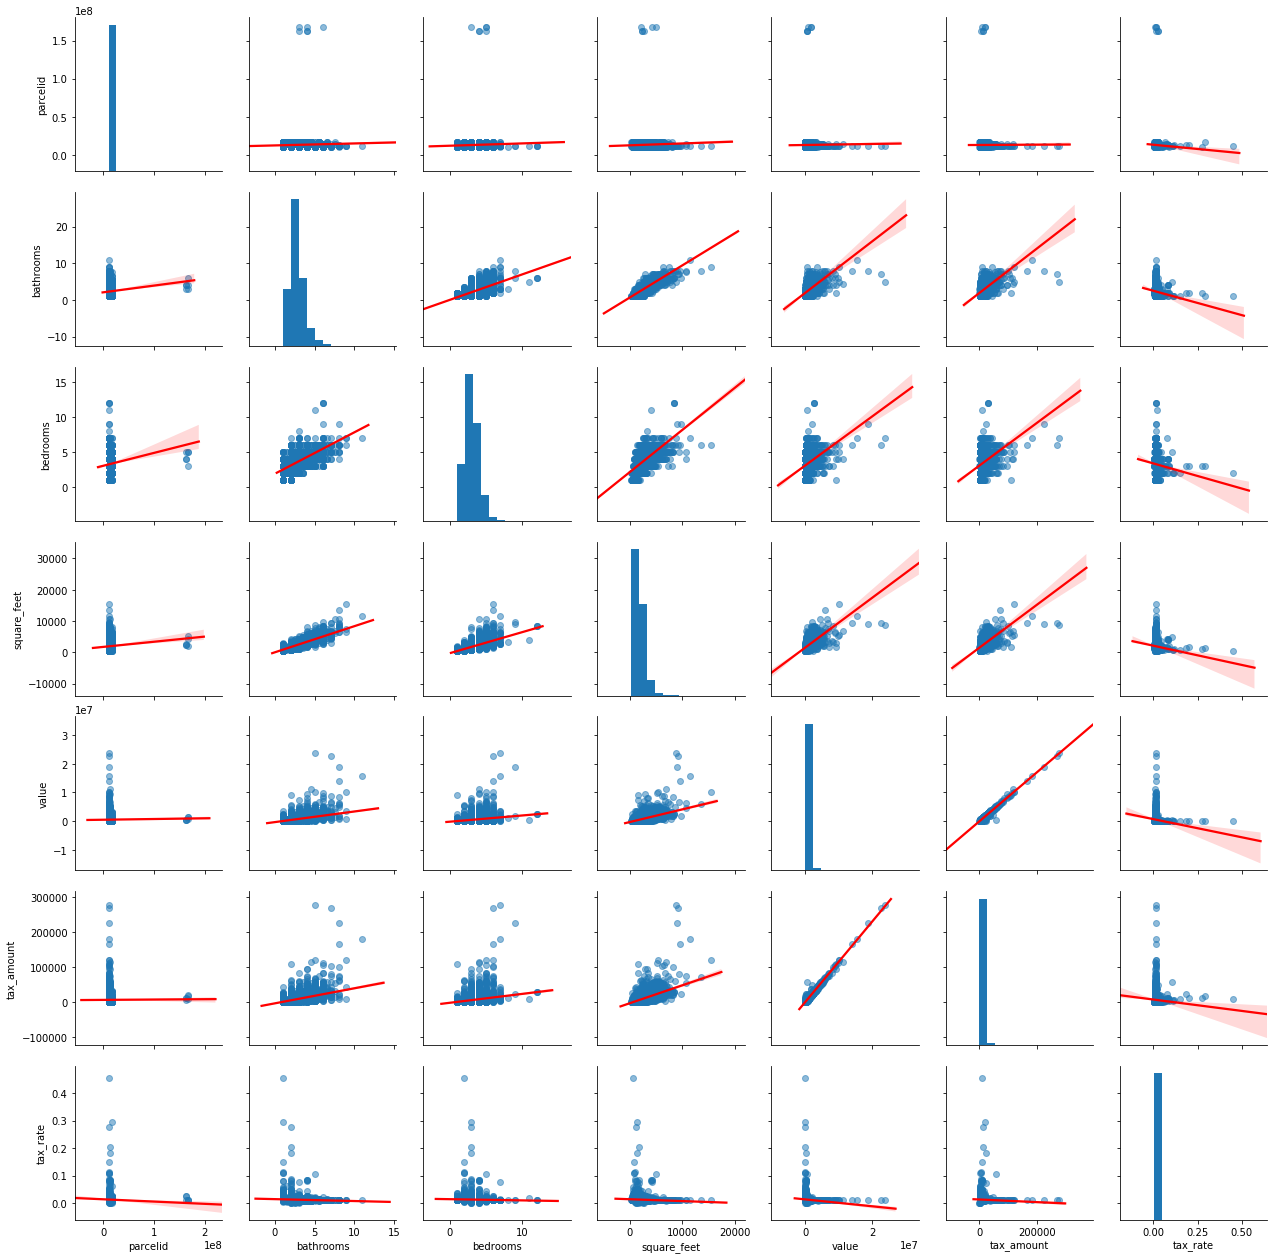

In [6]:
# Plot pairplots
sns.pairplot(train, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}})

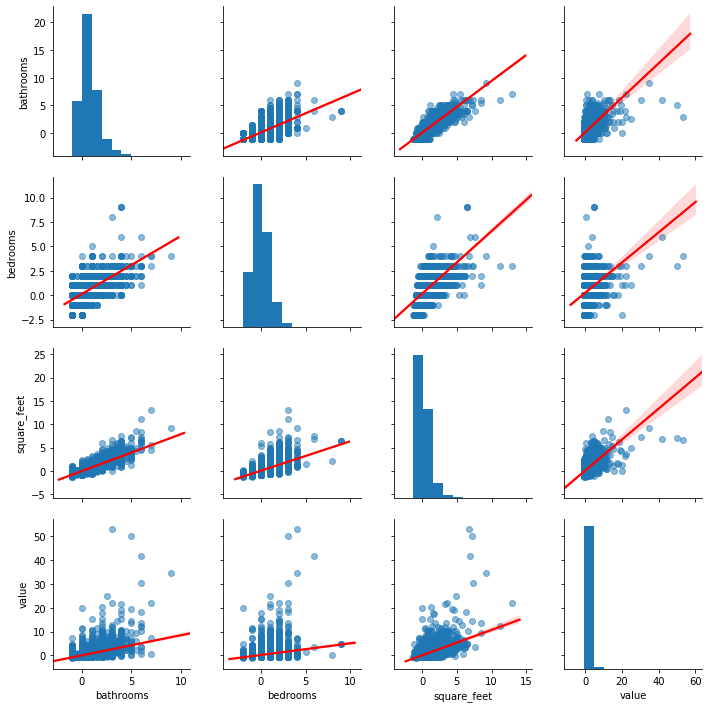

In [7]:
# Plot pairplots of scaled data
sns.pairplot(train_iqr, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}})

In [10]:
# Run t-tests on scaled data
x1 = train_iqr[train_iqr.bathrooms == 3].value
x2 = train_iqr[train_iqr.bathrooms == 2].value

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=5.691686097996774, pvalue=1.821218888730165e-08)

In [11]:
# Run t-tests on unscaled data
x1 = train[train.bathrooms == 3].value
x2 = train[train.bathrooms == 2].value

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=22.391393911552047, pvalue=1.537921639923889e-107)

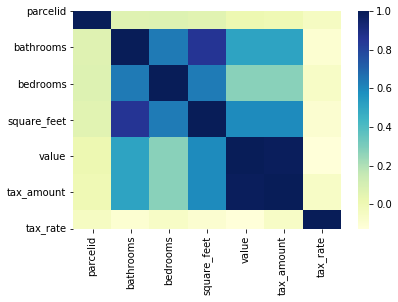

In [12]:
# Run correlation tests
corr = train.corr()
sns.heatmap(corr, cmap="YlGnBu",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

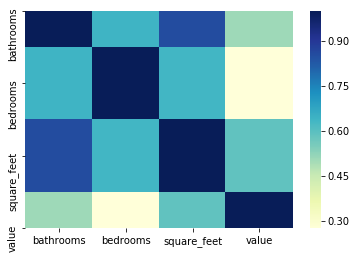

In [13]:
# Run correlation tests
corr = train_iqr.corr()
sns.heatmap(corr, cmap="YlGnBu",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
# Apparently, the number of bedrooms isn't very well correlated to the value, but bathrooms is